#Intro
The cell below contains a full run of analysis. It first Imports libraries, then reads in the data and prints a few images to provide an example of the dataset. It then creates a CNN and fits it on the train dataset. The model in this cell is the final selection.

In [ ]:
#Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#Folder Directories
X=[]
Z=[]
IMG_SIZE=150
DAISY_DIR='/content/drive/MyDrive/flowers/daisy'
SUNFLOWER_DIR='/content/drive/MyDrive/flowers/sunflower'
TULIP_DIR='/content/drive/MyDrive/flowers/tulip'
DANDI_DIR='/content/drive/MyDrive/flowers/dandelion'
ROSE_DIR='/content/drive/MyDrive/flowers/rose'



#Function to read in images 
def data_org(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(flower_type))


#Importing data seperated by file type
data_org('Daisy',DAISY_DIR)
data_org('Sunflower',SUNFLOWER_DIR)
data_org('Tulip',TULIP_DIR)
data_org('Dandelion',DANDI_DIR)
data_org('Rose',ROSE_DIR)

#NOTE: variable # of images for each flower type

#Print a few Images as examples
import matplotlib.pyplot as plt
import random as rn
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

l1=rn.randint(0,len(Z))
axes[0,0].imshow(X[l1]) 
axes[0,0].set_title(Z[l1])

l2=rn.randint(0,len(Z))
axes[1,0].imshow(X[l2]) 
axes[1,0].set_title(Z[l2])

l3=rn.randint(0,len(Z))
axes[2,0].imshow(X[l3]) 
axes[2,0].set_title(Z[l3])


l4=rn.randint(0,len(Z))
axes[0,1].imshow(X[l4]) 
axes[0,1].set_title(Z[l4])

l5=rn.randint(0,len(Z))
axes[1,1].imshow(X[l5]) 
axes[1,1].set_title(Z[l5])

l6=rn.randint(0,len(Z))
axes[2,1].imshow(X[l6]) 
axes[2,1].set_title(Z[l6])


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf



#Prepare data for model
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
#print(X)
#print("now")
X=X/255
#print(X)

np.random.seed(42)
rn.seed(42)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


#Create Model Structure
batch_size=128
epochs=50

model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model1.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model1.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model1.summary()

#Fit Model
reS1 = model1.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                             epochs = epochs, validation_data = (x_test,y_test),
                             verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)





#Train vs Test Loss graph
plt.plot(reS2.history['loss'])
plt.plot(reS2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()



#Train vs Test Accuracy graph
plt.plot(reS2.history['accuracy'])
plt.plot(reS2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


#Print out Kernel for feature selection
weights = None
layer_counter = 0
for layer in model.layers:
    if len(layer.get_weights()) > 0:
        weights = layer.get_weights()[0]
        layer_name = layer.name
        break
    layer_counter += 1
if weights is not None:
    weights_min = np.min(weights)
    weights_max = np.max(weights)
    weights = (weights - weights_min) / (weights_max - weights_min)
    fig, axs = plt.subplots(4,8, figsize=(20,20))
    fig.suptitle(f'Kernels of layer {layer_counter} - {layer_name}', fontsize=20)
    for i in range(weights.shape[-1]):
        ax = axs[i//8, i%8]
        ax.imshow(weights[:,:,0,i], cmap='gray', interpolation='nearest')
        ax.axis('off')
    plt.show()
else:
    print("No weights found in the model.")



# Perform predictions on the test set
predictions = model2.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)
correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]


# Print an example of correct prediction
correct_index = correct_indices[1]
correct_image = x_test[correct_index]
correct_label = predicted_labels[correct_index]
true_label = true_labels[correct_index]
print("Correctly predicted example:")
print("Predicted label:", correct_label)
print("True label:", true_label)
plt.imshow(correct_image)
plt.title(f"Predicted: {correct_label}, True: {true_label}")
plt.axis("off")
plt.show()


# Print an example of incorrect prediction
incorrect_index = incorrect_indices[1]
incorrect_image = x_test[incorrect_index]
incorrect_label = predicted_labels[incorrect_index]
true_label = true_labels[incorrect_index]
print("Incorrectly predicted example:")
print("Predicted label:", incorrect_label)
print("True label:", true_label)


plt.imshow(incorrect_image)
plt.title(f"Predicted: {incorrect_label}, True: {true_label}")
plt.axis("off")
plt.show()




##Scratch Work

The above cell contains all the elements of analysis I preformed, the rest of the worksheet is just segmented parts of the code above, but used on different models. Working with google Colab provided some challenges, especially handling the limited availability of the GPU. 

In [ ]:
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [ ]:
#/Users/charlieclarke/Downloads
X=[]
Z=[]
IMG_SIZE=150
DAISY_DIR='/content/drive/MyDrive/flowers/daisy'
SUNFLOWER_DIR='/content/drive/MyDrive/flowers/sunflower'
TULIP_DIR='/content/drive/MyDrive/flowers/tulip'
DANDI_DIR='/content/drive/MyDrive/flowers/dandelion'
ROSE_DIR='/content/drive/MyDrive/flowers/rose'

100%|██████████| 784/784 [00:04<00:00, 174.94it/s]


Text(0.5, 1.0, 'Tulip')

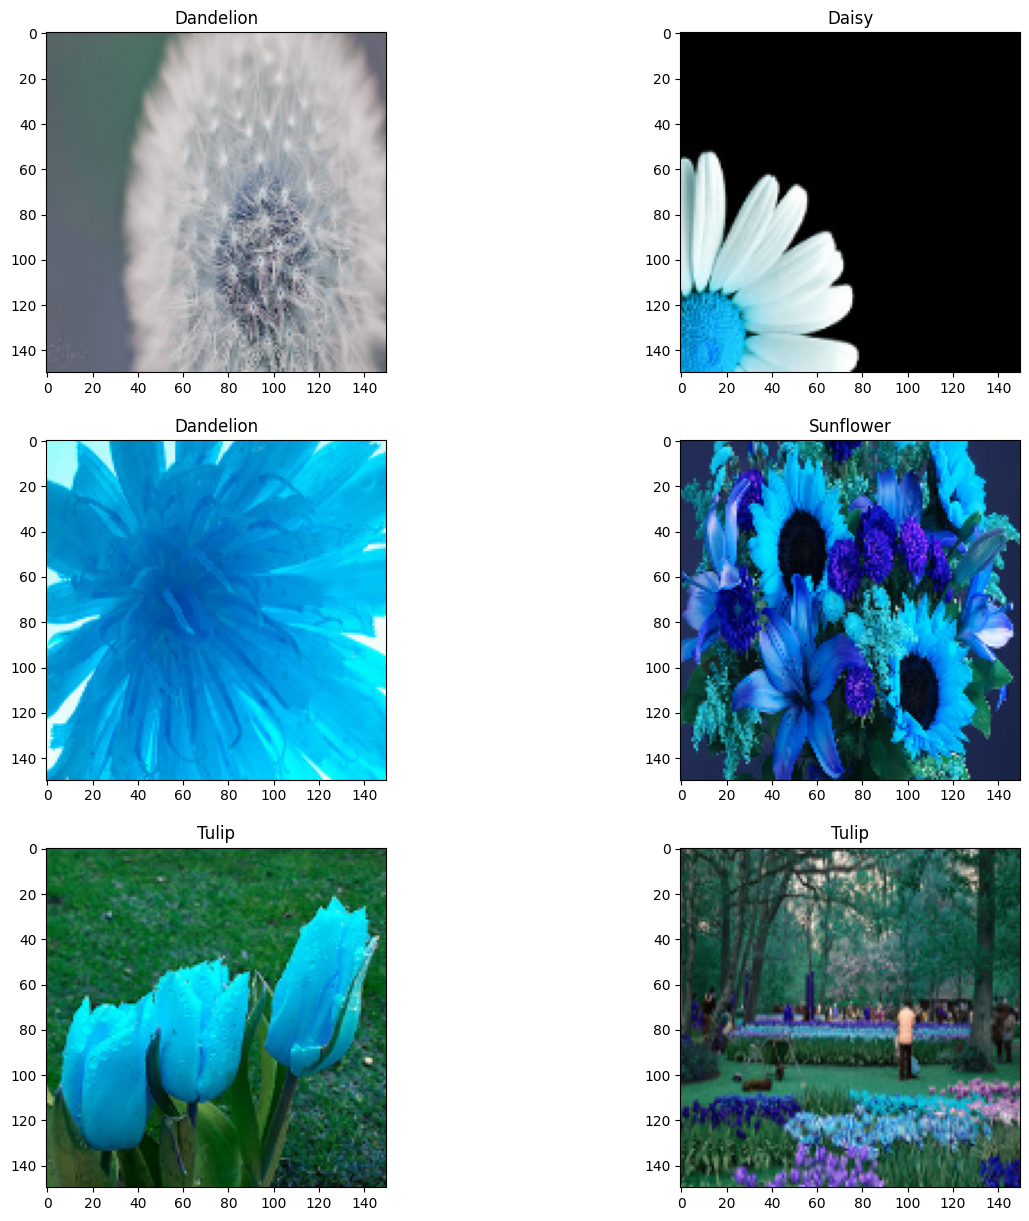

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical


from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#/Users/charlieclarke/Downloads
X=[]
Z=[]
IMG_SIZE=150
DAISY_DIR='/content/drive/MyDrive/flowers/daisy'
SUNFLOWER_DIR='/content/drive/MyDrive/flowers/sunflower'
TULIP_DIR='/content/drive/MyDrive/flowers/tulip'
DANDI_DIR='/content/drive/MyDrive/flowers/dandelion'
ROSE_DIR='/content/drive/MyDrive/flowers/rose'


def data_org(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(flower_type))



data_org('Daisy',DAISY_DIR)
data_org('Sunflower',SUNFLOWER_DIR)
data_org('Tulip',TULIP_DIR)
data_org('Dandelion',DANDI_DIR)
data_org('Rose',ROSE_DIR)
#variable # of images for each flower type

import matplotlib.pyplot as plt
import random as rn
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

l1=rn.randint(0,len(Z))
axes[0,0].imshow(X[l1]) 
axes[0,0].set_title(Z[l1])

l2=rn.randint(0,len(Z))
axes[1,0].imshow(X[l2]) 
axes[1,0].set_title(Z[l2])

l3=rn.randint(0,len(Z))
axes[2,0].imshow(X[l3]) 
axes[2,0].set_title(Z[l3])


l4=rn.randint(0,len(Z))
axes[0,1].imshow(X[l4]) 
axes[0,1].set_title(Z[l4])

l5=rn.randint(0,len(Z))
axes[1,1].imshow(X[l5]) 
axes[1,1].set_title(Z[l5])

l6=rn.randint(0,len(Z))
axes[2,1].imshow(X[l6]) 
axes[2,1].set_title(Z[l6])



First model is below 

100%|██████████| 784/784 [00:04<00:00, 187.65it/s]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


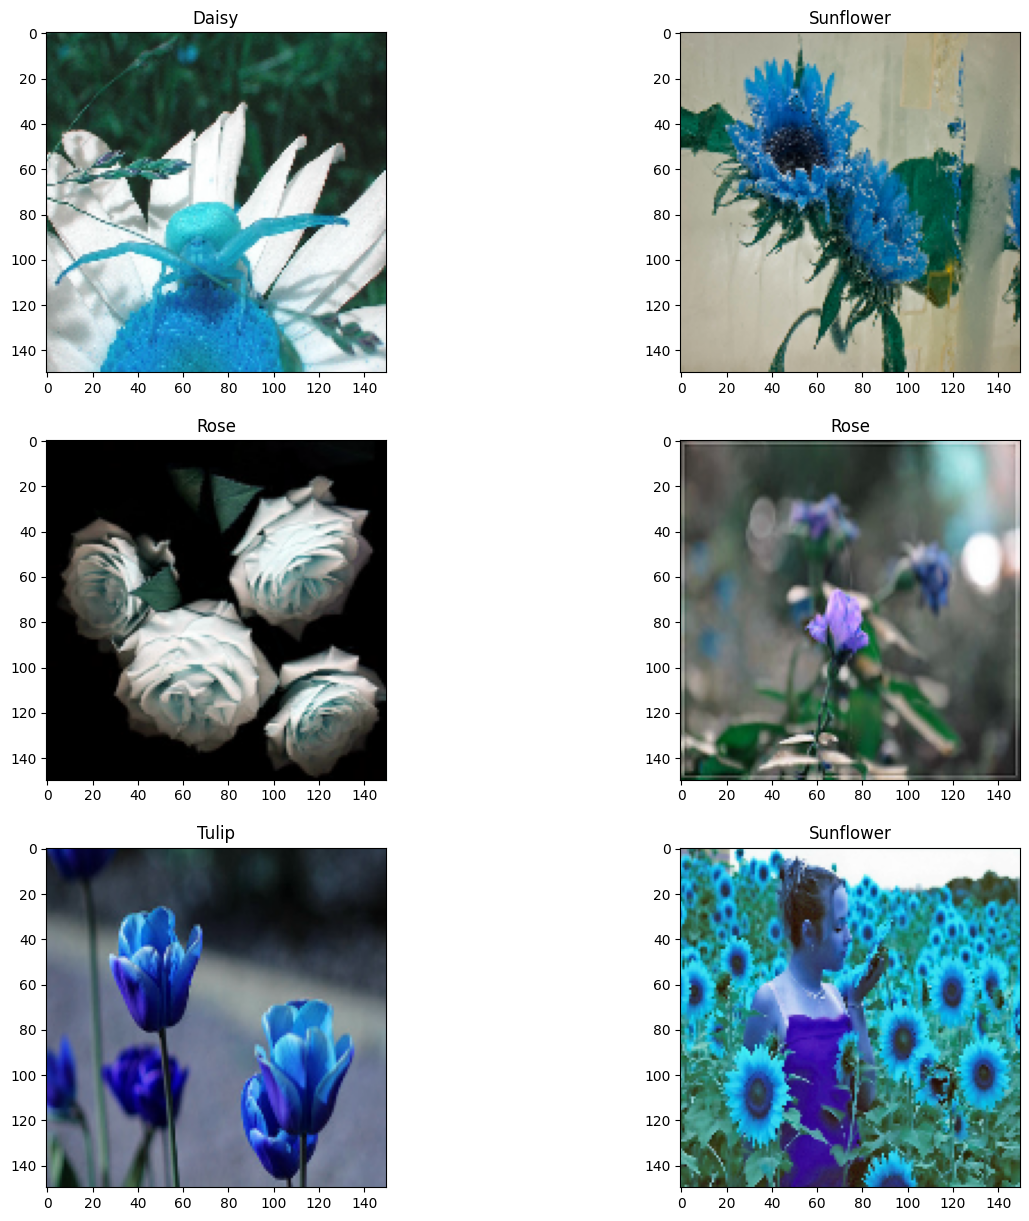

In [4]:


#/Users/charlieclarke/Downloads
X=[]
Z=[]
IMG_SIZE=150
DAISY_DIR='/content/drive/MyDrive/flowers/daisy'
SUNFLOWER_DIR='/content/drive/MyDrive/flowers/sunflower'
TULIP_DIR='/content/drive/MyDrive/flowers/tulip'
DANDI_DIR='/content/drive/MyDrive/flowers/dandelion'
ROSE_DIR='/content/drive/MyDrive/flowers/rose'


def data_org(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(flower_type))



data_org('Daisy',DAISY_DIR)
data_org('Sunflower',SUNFLOWER_DIR)
data_org('Tulip',TULIP_DIR)
data_org('Dandelion',DANDI_DIR)
data_org('Rose',ROSE_DIR)
#variable # of images for each flower type

import matplotlib.pyplot as plt
import random as rn
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

l1=rn.randint(0,len(Z))
axes[0,0].imshow(X[l1]) 
axes[0,0].set_title(Z[l1])

l2=rn.randint(0,len(Z))
axes[1,0].imshow(X[l2]) 
axes[1,0].set_title(Z[l2])

l3=rn.randint(0,len(Z))
axes[2,0].imshow(X[l3]) 
axes[2,0].set_title(Z[l3])


l4=rn.randint(0,len(Z))
axes[0,1].imshow(X[l4]) 
axes[0,1].set_title(Z[l4])

l5=rn.randint(0,len(Z))
axes[1,1].imshow(X[l5]) 
axes[1,1].set_title(Z[l5])

l6=rn.randint(0,len(Z))
axes[2,1].imshow(X[l6]) 
axes[2,1].set_title(Z[l6])




#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf


le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
#print(X)
#print("now")
X=X/255
#print(X)

np.random.seed(42)
rn.seed(42)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)



from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

batch_size=64
epochs=25

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()



reS = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                            epochs = epochs, validation_data = (x_test,y_test),
                            verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)




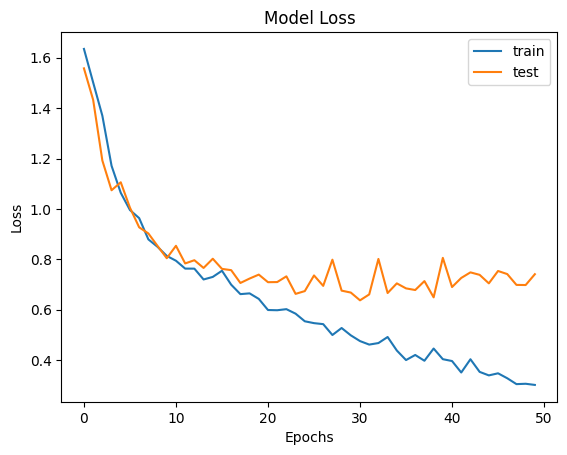

In [6]:
plt.plot(reS2.history['loss'])
plt.plot(reS2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()





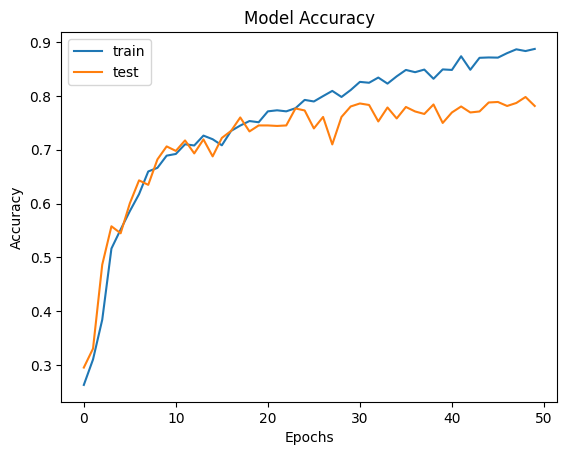

In [7]:
plt.plot(reS2.history['accuracy'])
plt.plot(reS2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [17]:
epoch_number = 25

print("Train Accuracy", reS1.history['accuracy'][epoch_number])
print("Test Accuracy",reS1.history['val_accuracy'][epoch_number])
print("Train Loss",reS1.history['loss'][epoch_number])
print("Test Loss",reS1.history['val_loss'][epoch_number])

Train Accuracy 0.7767770886421204
Test Accuracy 0.7627432942390442
Train Loss 0.6029645204544067
Test Loss 0.6778823733329773


In [4]:
batch_size=128
epochs=50

model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model1.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model1.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model1.summary()

reS1 = model1.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                             epochs = epochs, validation_data = (x_test,y_test),
                             verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 128)      

In [5]:
batch_size=128
epochs=50

model2 = Sequential()

model2.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model2.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model2.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model2.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(5, activation='softmax'))

model2.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model2.summary()

reS2 = model2.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                             epochs = epochs, validation_data = (x_test,y_test),
                             verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        102464    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 128)      

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
#print(X)
#print("now")
X=X/255
#print(X)

In [ ]:
np.random.seed(42)
rn.seed(42)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [4]:
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

batch_size=128
epochs=50


clsf = Sequential()
clsf.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
clsf.add(MaxPooling2D(pool_size=(2, 2)))
clsf.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
clsf.add(MaxPooling2D(pool_size=(2, 2)))
clsf.add(Flatten())
clsf.add(Dense(units=128, activation='relu'))
clsf.add(Dense(units=4, activation='softmax'))
clsf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#aclsf.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
clsf.summary()

clsf_info = clsf.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                             epochs = epochs, validation_data = (x_test,y_test),
                             verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)



NameError: ignored

In [ ]:
batch_size=128
epochs=50

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

34/34 [==============================] - 1s 21ms/step
Correctly predicted example:
Predicted label: 4
True label: 4


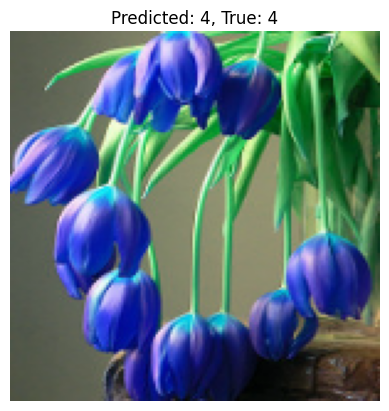

Incorrectly predicted example:
Predicted label: 2
True label: 4


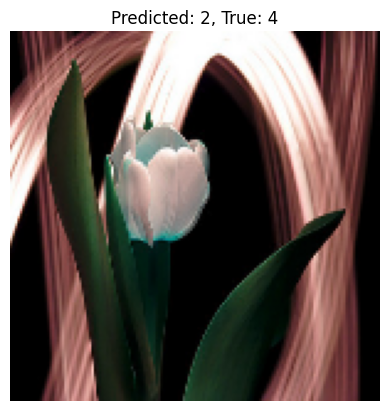

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# Perform predictions on the test set
predictions = model2.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)
correct_indices = np.where(predicted_labels == true_labels)[0]
incorrect_indices = np.where(predicted_labels != true_labels)[0]


# Print an example of correct prediction
correct_index = correct_indices[1]
correct_image = x_test[correct_index]
correct_label = predicted_labels[correct_index]
true_label = true_labels[correct_index]
print("Correctly predicted example:")
print("Predicted label:", correct_label)
print("True label:", true_label)
plt.imshow(correct_image)
plt.title(f"Predicted: {correct_label}, True: {true_label}")
plt.axis("off")
plt.show()


# Print an example of incorrect prediction
incorrect_index = incorrect_indices[1]
incorrect_image = x_test[incorrect_index]
incorrect_label = predicted_labels[incorrect_index]
true_label = true_labels[incorrect_index]
print("Incorrectly predicted example:")
print("Predicted label:", incorrect_label)
print("True label:", true_label)


plt.imshow(incorrect_image)
plt.title(f"Predicted: {incorrect_label}, True: {true_label}")
plt.axis("off")
plt.show()




In [ ]:
batch_size=128
epochs=50

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 37, 37, 128)      

In [ ]:
reS = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                             epochs = epochs, validation_data = (x_test,y_test),
                             verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
25/25 [==============================] - 590s 24s/step - loss: 1.5768 - accuracy: 0.2750 - val_loss: 1.4889 - val_accuracy: 0.3225
Epoch 2/50
25/25 [==============================] - 586s 24s/step - loss: 1.4146 - accuracy: 0.3712 - val_loss: 1.2832 - val_accuracy: 0.4180
Epoch 3/50
25/25 [==============================] - 581s 23s/step - loss: 1.2131 - accuracy: 0.4802 - val_loss: 1.1810 - val_accuracy: 0.4866
Epoch 4/50
25/25 [==============================] - 582s 23s/step - loss: 1.1436 - accuracy: 0.5204 - val_loss: 1.0975 - val_accuracy: 0.5375
Epoch 5/50
25/25 [==============================] - 585s 24s/step - loss: 1.0753 - accuracy: 0.5626 - val_loss: 1.1830 - val_accuracy: 0.5385
Epoch 6/50
25/25 [==============================] - 596s 24s/step - loss: 1.0470 - accuracy: 0.5722 - val_loss: 1.1760 - val_accuracy: 0.5589
Epoch 7/50
25/25 [==============================] - 583s 23s/step - loss: 1.0161 - accuracy: 0.5838 - val_loss: 0.9984 - val_accuracy: 0.6182
Epoch 

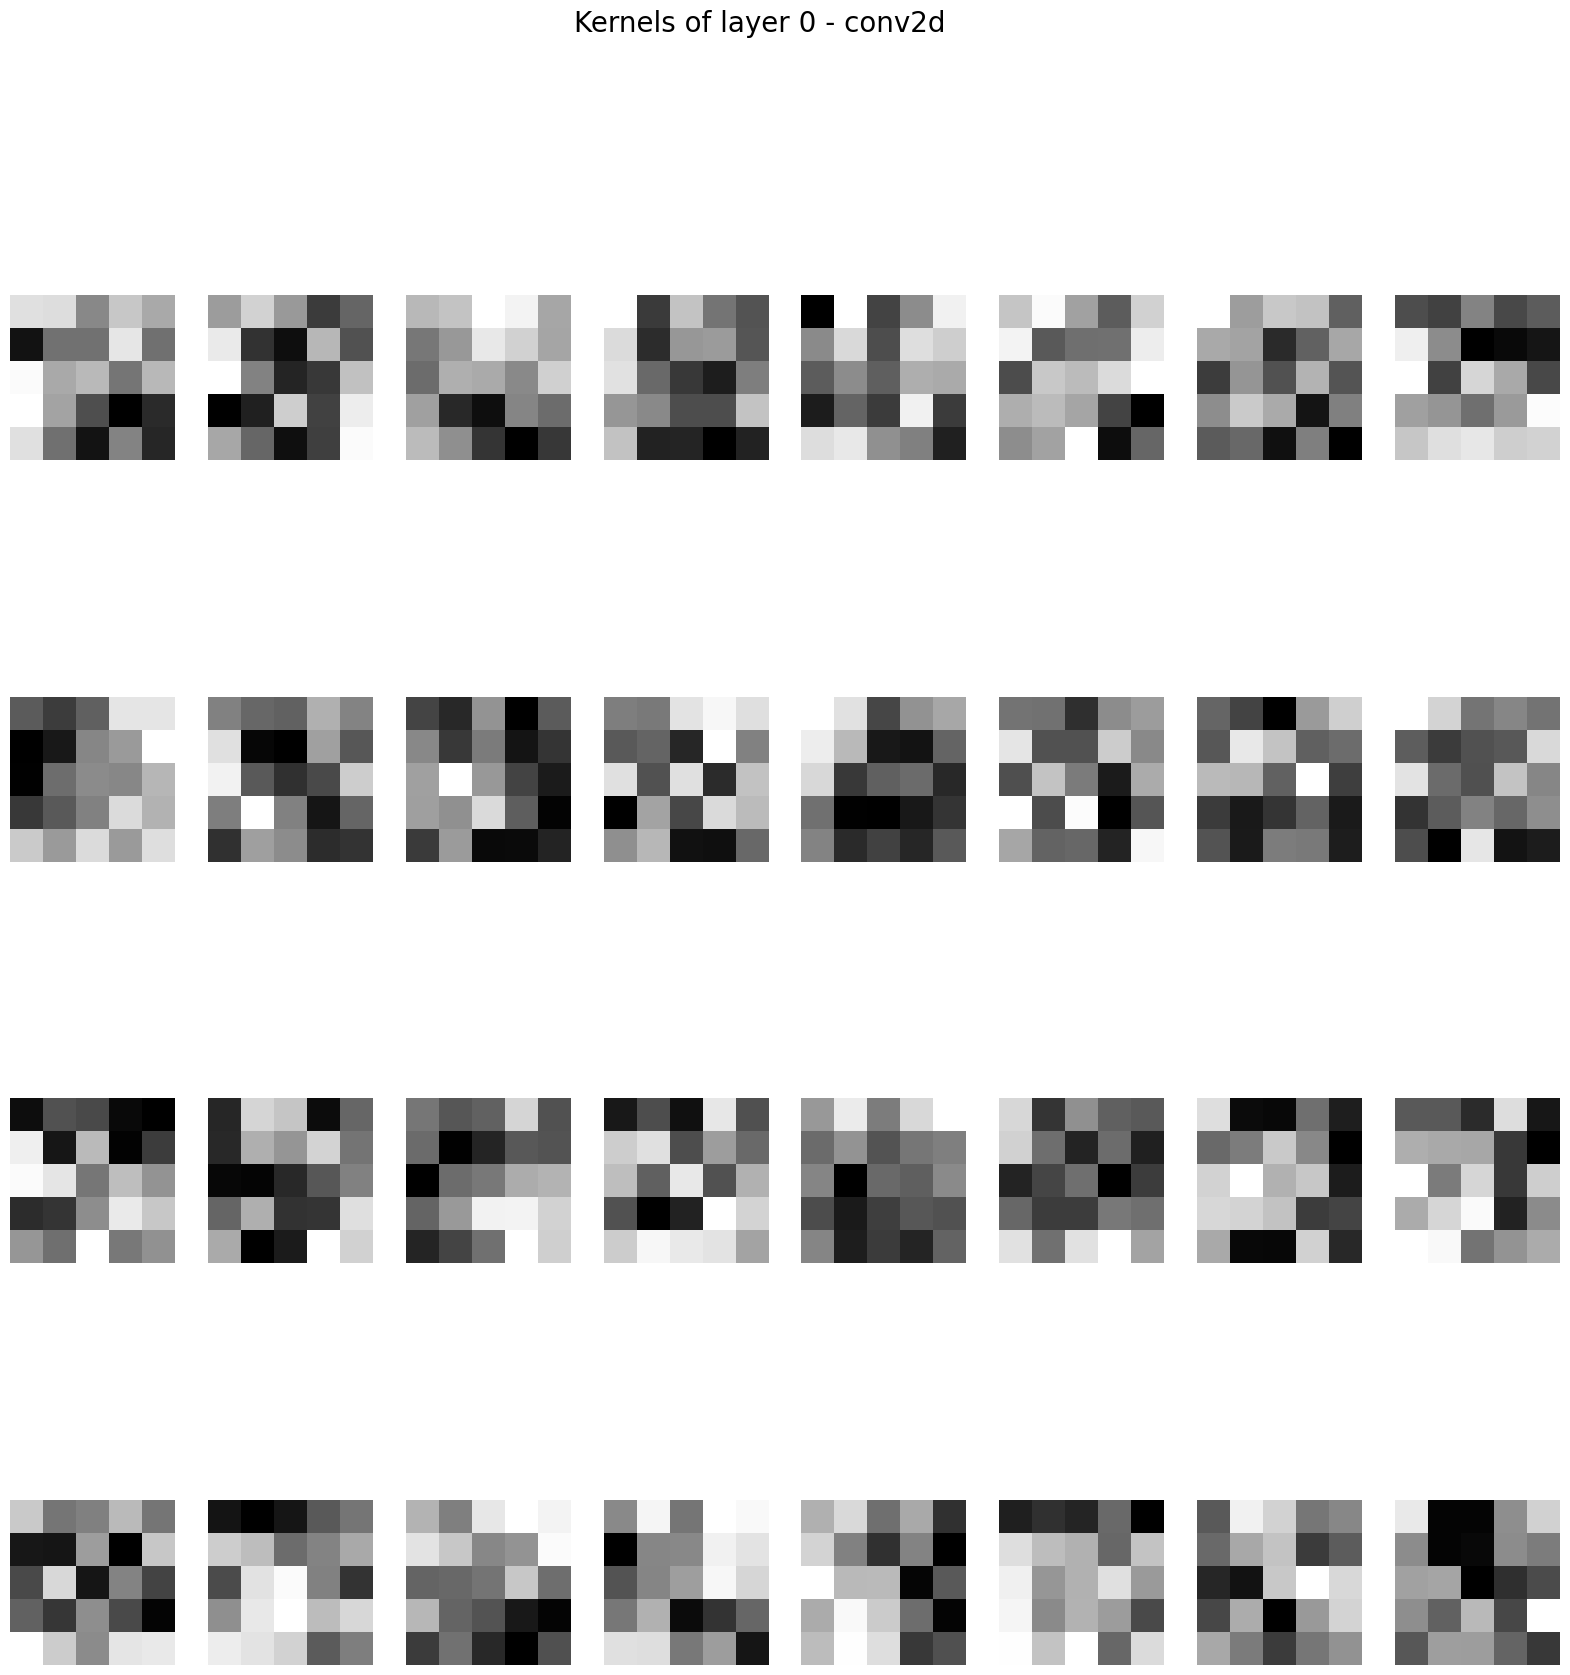

In [5]:
weights = None
layer_counter = 0
for layer in model.layers:
    if len(layer.get_weights()) > 0:
        weights = layer.get_weights()[0]
        layer_name = layer.name
        break
    layer_counter += 1
if weights is not None:
    weights_min = np.min(weights)
    weights_max = np.max(weights)
    weights = (weights - weights_min) / (weights_max - weights_min)
    fig, axs = plt.subplots(4,8, figsize=(20,20))
    fig.suptitle(f'Kernels of layer {layer_counter} - {layer_name}', fontsize=20)
    for i in range(weights.shape[-1]):
        ax = axs[i//8, i%8]
        ax.imshow(weights[:,:,0,i], cmap='gray', interpolation='nearest')
        ax.axis('off')
    plt.show()
else:
    print("No weights found in the model.")

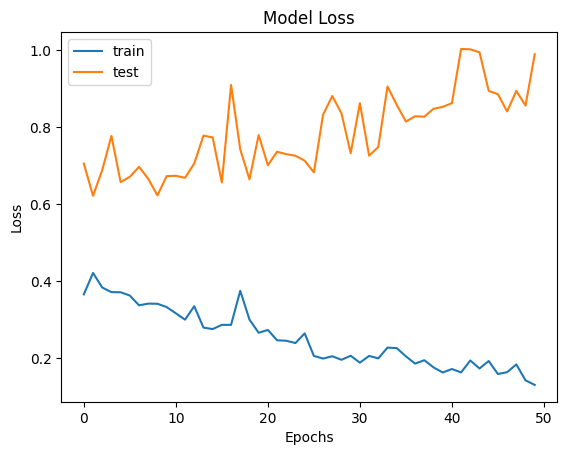

In [ ]:
plt.plot(reS.history['loss'])
plt.plot(reS.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
print(reS.history)

{'loss': [1.3640025854110718, 1.1810921430587769, 1.0455206632614136, 0.9782341122627258, 0.9254044890403748, 0.883158266544342, 0.8390181064605713, 0.8431115746498108, 0.8163423538208008, 0.7775459289550781, 0.7712846994400024, 0.7286074161529541, 0.6938832998275757, 0.6974861025810242, 0.6461769938468933, 0.6357771158218384, 0.6238806843757629, 0.606594979763031, 0.5909253358840942, 0.593082070350647, 0.5969967246055603, 0.5732592940330505, 0.545443058013916, 0.5662907958030701, 0.5314731001853943, 0.5101785063743591, 0.5312575101852417, 0.4908410310745239, 0.5213696360588074, 0.5265578627586365, 0.4579235017299652, 0.4187932014465332, 0.44588738679885864, 0.41521814465522766, 0.4137989580631256, 0.40494248270988464, 0.3784863352775574, 0.4051089882850647, 0.371281236410141, 0.388675332069397, 0.3782292306423187, 0.33584561944007874, 0.31789150834083557, 0.3141098916530609, 0.3358672559261322, 0.3166350722312927, 0.318734735250473, 0.30405130982398987, 0.30638793110847473, 0.27442187

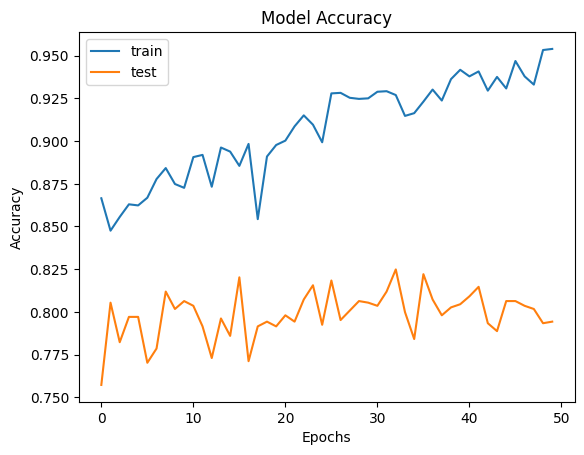

In [ ]:
plt.plot(reS.history['accuracy'])
plt.plot(reS.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()